In [3]:
import cv2
import numpy as np
import pandas as pd
import skimage

In [2]:
x=pd.read_csv('Train.csv')
# print(x)

In [8]:
cx,cy,dx,dy = x['Top'][0],x['Left'][0],x['Width'][0],x['Height'][0]
dx += cx
dy += cy 
print cx,cy,dx,dy

131 1687 294 1850


In [31]:
print(x['Width'].mean())
print(x['Height'].mean())

print(x['Width'].min())
print(x['Height'].min())
im=cv2.imread('Train/'+x['Img_Name'][0]);
print(im.shape[0],im.shape[1])

56.6944444444
63.1773504274
13
16
(1080, 1920)


In [32]:
for i in range(len(x)):
    im=cv2.imread('Train/'+x['Img_Name'][i]);
    cx,cy,dx,dy = x['Top'][i],x['Left'][i],x['Width'][i],x['Height'][i]
    dx=63
    dy=57
    dx += cx
    dy += cy 

    cropped = im[int(cx):int(dx),int(cy):int(dy)]
    cv2.imwrite('apos/p'+str(i)+'.jpg',cropped)

In [9]:
cnt=1
for i in range(len(x)):
    im=cv2.imread('Train/'+x['Img_Name'][i]);
#     cx,cy,dx,dy = x['Top'][i],x['Left'][i],x['Width'][i],x['Height'][i]
#     dx += cx
#     dy += cy
    for j in range(20,im.shape[0]-250,250):
        for k in range(20,im.shape[1]-250,250):
                cropped = im[j:j+250,k:k+250]
                cv2.imwrite('negn/neg'+str(cnt)+'.jpg',cropped)
                cnt+=1

In [5]:
#get the features 
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage.io import imread
from sklearn.externals import joblib

In [6]:
import glob
file_pos=[]
for filename in glob.glob('apos/*.jpg'):
    file_pos.append(filename)

In [7]:
import glob
file_pos_no_avg=[]
for filename in glob.glob('pos/*.jpg'):
    file_pos_no_avg.append(filename)
# import re
# def natural_key(string_):
#     return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]
# file_pos= file_pos.sort(key=natural_key)
# print(file_pos)

In [24]:
import glob
file_neg=[]
for filename in glob.glob('negs/*.jpg'):
    file_neg.append(filename)
print(len(file_neg))
# print(file_neg)

6970


In [8]:
%matplotlib inline
#small trial 

import skimage.io as io
import matplotlib.pyplot as plt
from skimage import data, color, exposure

In [79]:
#positive check 

im = cv2.imread('apos/p2.jpg',0)
# print(im)
cv2.imwrite('prehog_try2.jpg',im)
fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
                    cells_per_block=(1, 1), visualise=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

imgplot = plt.imshow(hog_image)
plt.savefig('hog22.jpg')
plt.clf()

im = cv2.imread('apos/p3.jpg',0)
cv2.imwrite('prehog_try3.jpg',im)
fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5,5),
                    cells_per_block=(1, 1), visualise=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

imgplot = plt.imshow(hog_image)
plt.savefig('hog32.jpg')

plt.gcf().clear()
plt.close()

im = cv2.imread('apos/p10.jpg',0)
cv2.imwrite('prehog_try10.jpg',im)
fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5,5),
                    cells_per_block=(1, 1), visualise=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

imgplot = plt.imshow(hog_image)
plt.savefig('hog10.jpg')

plt.gcf().clear()
plt.close()

In [78]:
# print(file_pos)

In [80]:

for i in file_pos:
    im = cv2.imread(i,0)
    
    fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
                    cells_per_block=(1, 1), visualise=True)
#     hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    
    imgplot = plt.imshow(hog_image) 
    plt.savefig('phog_images/'+i[4:])
    plt.gcf().clear()
    plt.close()
    joblib.dump(fd,'fdp/'+i[4:-4]+'.feat')
    

In [9]:

for i in file_pos_no_avg:
    im = cv2.imread(i,0)
    
    fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
                    cells_per_block=(1, 1), visualise=True)
#     hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    
    imgplot = plt.imshow(hog_image) 
    plt.savefig('phog_images_no_avg/'+i[4:])
    plt.gcf().clear()
    plt.close()
    joblib.dump(fd,'fdp_no_avg/'+i[4:-4]+'.feat')
    
    #remember normalization if you go with this

In [34]:
import sklearn.preprocessing
for i in file_pos_no_avg:
    im = cv2.imread(i,0)
    
    fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
                    cells_per_block=(1, 1), visualise=True)
#     hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
# normalise 
    try :
        fd=sklearn.preprocessing.normalize(fd, norm='l2', axis=1, copy=True, return_norm=False)
    except:
        pass
#     imgplot = plt.imshow(hog_image) 
#     plt.savefig('phog_images_no_avg_normalized/'+i[4:])
#     plt.gcf().clear()
#     plt.close()
    joblib.dump(fd,'fdp_no_avg_normalized/'+i[4:-4]+'.feat')
    
    #remember normalization if you go with this

/home/v_g/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/v_g/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/v_g/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [35]:
# normalize check
# i = 'pos/p1.jpg'
# im = cv2.imread(i,0)

# fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
#                 cells_per_block=(1, 1), visualise=True)
# print('hey')
# fd1=sklearn.preprocessing.normalize(fd, norm='l2', axis=1, copy=True, return_norm=False)
# print(fd1)


In [56]:

count=0

for i in file_neg:
    
    count+=1
    if count<2500:
        im = cv2.imread(i,0)
        im = cv2.resize(im,(63,57))
        fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
                        cells_per_block=(1, 1), visualise=True)
        if count==1:
            print(fd.shape)
#         try :
#             fd=sklearn.preprocessing.normalize(fd, norm='l2', axis=1, copy=True, return_norm=False)
#         except:
#             pass
    #     hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    #     if count<1000:
    #         imgplot = plt.imshow(hog_image) 
    #         plt.savefig('nhog_images_normalized/'+i[4:])
    #         plt.gcf().clear()
    #         plt.close()

        joblib.dump(fd,'fdn_equal/'+i[4:-4]+'.feat')


(1056,)


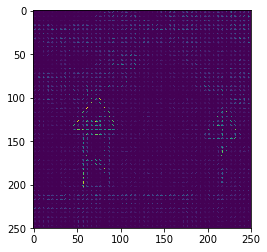

In [26]:
#negative check
im = cv2.imread('negs/neg8.jpg',0)
# print(im)
# cv2.imwrite('preneg_try.jpg',im)
# plt.imshow(im)
fd, hog_image = hog(im, orientations=8, pixels_per_cell=(5, 5),
                    cells_per_block=(1, 1), visualise=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

imgplot = plt.imshow(hog_image)
plt.savefig('neghog.jpg')
# plt.clf()


In [82]:
from skimage.feature import local_binary_pattern
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import argparse as ap
import glob
import os


In [104]:
# executing the classifier 
fds = []
labels = []
# Load the positive features
shapes=[]
shapesn=[]
c1=0
c2=0
for feat_path in glob.glob("fdp/*.feat"):
    fd = joblib.load(feat_path)
    c1+=1
    if c1<2:
        print(fd.shape)
#     fd=fd.reshape(-1,1)
#     print fd.shape
    if c1<2:
        print(fd)
    if fd.shape == (1056,):
        fds.append(fd)
        labels.append(1)
    else :
        print('boom')
    shapes.append(fd.shape)


print(c1)
# Load the negative features
ct=0
for feat_path in glob.glob("fdn_equal/*.feat"):
    fd = joblib.load(feat_path)
    c2+=1
#     if c2<10:
    
#     fd=fd.reshape(-1,1) 
#     print fd.shape
    
    if fd.shape == (1056,) and ct<=936 :
        ct+=1
        fds.append(fd)
        labels.append(0)
    elif ct> 936:
        break
    else :
        print('nboom')
    shapesn.append(fd.shape)
    
print(c2)
# print(shapes)
# print(shapesn)
clf = SVC()
print "Training a SVM Classifier"
# nsamples, nx, ny = fds.shape
# fds2 = fds.reshape((nsamples,nx*ny))
clf.fit(fds, labels)
joblib.dump(clf,"models/dump2")


(1056,)
[ 0.1521689   0.          0.14346621 ...,  0.12933039  0.          0.08179573]
boom
boom
boom
boom
boom
boom
boom
boom
boom
boom
468
938
Training a SVM Classifier


['models/dump2']

In [105]:
#model testing
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
from sklearn.externals import joblib
import cv2

In [106]:
def sliding_window(image, window_size, step_size):
    for y in xrange(0, image.shape[0], step_size[1]):
        for x in xrange(0, image.shape[1], step_size[0]):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])


In [140]:
im = imread('Test/03-04 05.40.31.jpg', as_grey=True)
min_wdw_sz = (63, 57)
step_size = (10, 10)
downscale = 1.5
visualize_det =False
import warnings
warnings.filterwarnings('ignore')
import time



In [141]:
# clf = joblib.load()
detections = []
# The current scale of the image
scale = 0
cut=0
start = time.time()
print("hello")
for im_scaled in pyramid_gaussian(im, downscale=downscale):
    # detections at the current scale
    cd = []
    if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
        break
    for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
        if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
            continue
        # Calculate the HOG features
        fd,hog_image2 = hog(im_window,8,(5,5),(1,1), visualise=True)
#         print(fd.50shape)
        pred = clf.predict(fd)
        if pred == 1:
            print  "Detection:: Location -> ({}, {})".format(x, y)
            print "Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd))
            detections.append((x, y, clf.decision_function(fd),
                int(min_wdw_sz[0]*(downscale**scale)),
                int(min_wdw_sz[1]*(downscale**scale))))
            cd.append(detections[-1])
        if visualize_det:
            clone = im_scaled.copy()
            for x1, y1, _, _, _  in cd:
                cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                    im_window.shape[0]), (0, 0, 0), thickness=2)
            cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                im_window.shape[0]), (255, 255, 255), thickness=2)
            
#             cv2.imwrite('bound/'+str(cut)+'.jpg',clone)
#             cut+=1
#             cv2.waitKey(30)
    # Move the the next scale
    scale+=1

# Display the results before performing NMS
clone = im.copy()
for (x_tl, y_tl, _, w, h) in detections:
    # Draw the detections
    cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=2)
cv2.imwrite('bound/'+str(1)+'.jpg', im)
end = time.time()
print(end - start)

# cv2.waitKey()

hello
Detection:: Location -> (50, 360)
Scale ->  0 | Confidence Score [ 0.02594619] 

Detection:: Location -> (30, 370)
Scale ->  0 | Confidence Score [ 0.23630022] 

Detection:: Location -> (40, 370)
Scale ->  0 | Confidence Score [ 0.25887509] 

Detection:: Location -> (50, 370)
Scale ->  0 | Confidence Score [ 0.15376543] 

Detection:: Location -> (20, 240)
Scale ->  1 | Confidence Score [ 0.29119583] 

Detection:: Location -> (30, 240)
Scale ->  1 | Confidence Score [ 0.03077207] 

Detection:: Location -> (260, 380)
Scale ->  1 | Confidence Score [ 0.07930285] 

626.888223886


In [143]:
print (detections)

[(50, 360, array([ 0.02594619]), 63, 57), (30, 370, array([ 0.23630022]), 63, 57), (40, 370, array([ 0.25887509]), 63, 57), (50, 370, array([ 0.15376543]), 63, 57), (20, 240, array([ 0.29119583]), 94, 85), (30, 240, array([ 0.03077207]), 94, 85), (260, 380, array([ 0.07930285]), 94, 85)]


In [144]:
def overlapping_area(detection_1, detection_2):
    # Calculate the x-y co-ordinates of the 
    # rectangles
    x1_tl = detection_1[0]
    x2_tl = detection_2[0]
    x1_br = detection_1[0] + detection_1[3]
    x2_br = detection_2[0] + detection_2[3]
    y1_tl = detection_1[1]
    y2_tl = detection_2[1]
    y1_br = detection_1[1] + detection_1[4]
    y2_br = detection_2[1] + detection_2[4]
    # Calculate the overlapping Area
    x_overlap = max(0, min(x1_br, x2_br)-max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br)-max(y1_tl, y2_tl))
    overlap_area = x_overlap * y_overlap
    area_1 = detection_1[3] * detection_2[4]
    area_2 = detection_2[3] * detection_2[4]
    total_area = area_1 + area_2 - overlap_area
    return overlap_area / float(total_area)

def nms(detections, threshold=.5):
    if len(detections) == 0:
        return []
    # Sort the detections based on confidence score
    detections = sorted(detections, key=lambda detections: detections[2],
            reverse=True)
    # Unique detections will be appended to this list
    new_detections=[]
    # Append the first detection
    new_detections.append(detections[0])
    # Remove the detection from the original list
    del detections[0]
    for index, detection in enumerate(detections):
        for new_detection in new_detections:
            if overlapping_area(detection, new_detection) > threshold:
                del detections[index]
                break
        else:
            new_detections.append(detection)
            del detections[index]
    return new_detections




In [145]:
nms(detections)

[(20, 240, array([ 0.29119583]), 94, 85),
 (40, 370, array([ 0.25887509]), 63, 57)]